In [1]:
# import os module
import os

# import AUTO modules
from auto import AUTOCommands as ac
from auto import AUTOclui as acl
from auto import interactiveBindings as ib
from auto import runAUTO as ra

# import plotting tools
import matplotlib as mpl
from matplotlib import pyplot as plt

# virtual display to use AUTO plot function
from pyvirtualdisplay import Display
from IPython.display import display as display
from PIL import Image
disp = Display(visible=0, size=(1366,768))
disp.start()

In [2]:
# use working directory for demo to avoid clutter
folder = '/auto/workspace/demos/demo'
os.chdir(folder)

In [6]:
# copy demo into current directory
ac.copydemo('p2c')

# start AUTO with runner object
runner = ra.runAUTO()

# initial part
print("find the Branch point")
r = ac.run(e='p2c',NDIM=3,ILP=0,STOP="BP1",MXBF=0,DS=0.3,DSMAX=25,NPAR=23,runner=runner)

# initial part
print("find the Hopf bifurcation")
r = r + ac.run(r('BP1'),ISW=-1,STOP="HB1",runner=runner)

print("a solution branch starting from the Hopf bifurcation")
sol = ac.run(r('HB1'),IPS=2,ICP=[1,11],NTST=50,UZSTOP={1:21},runner=runner)

print("continue zero eigenfunction until eigenvalue")
zero = ac.run(sol,
              NDIM=6,IPS=4,ICP=[12,11,10],NBC=7,NINT=1,
              DS=1.e-3,DSMIN=1.e-5,DSMAX=1.e-2,STOP=["BP2"],runner=runner)
bp = zero('BP1')

print("switch to continuation of nontrivial eigenfunction")
norm1 = ac.run(bp,ISW=-1,UZSTOP={10:1.0},STOP=[],runner=runner)

# Add initial "connection" into the last three dimensions and do
# the first homotopy
print("homotopy in (T,h1)")
h1 = ac.run(norm1,
            NDIM=9,ICP=[13,11,12,21,14,15,16,17,18,19,20,22],ISW=1,ISP=0,
            NBC=19,THL={13:0,11:0},
            DS=0.1,DSMIN=1e-10,DSMAX=500,
            UZR={21:0},UZSTOP={},STOP=["UZ3"],runner=runner)

print("homotopy in (r,h2)")
h2 = ac.run(h1('UZ3'),NINT=0,
            ICP=[11,1,12,14,15,16,17,18,19,20,22],DS=-1,DSMIN=1.e-5,NBC=19,
            UZR={22:0},STOP=["UZ1"],runner=runner)

print("homotopy in (T,r)")
h3 = ac.run(h2,DS=1,
            ICP=[13,1,11,12,14,15,16,17,18,19,20],NBC=19,
            UZR={13:[3,4]}, UZSTOP={13:5}, STOP=[],runner=runner)

print("fwd continuation in two system parameters")
cont = ac.load(h3('UZ1'),DS=1.e-5,DSMIN=1.e-7,DSMAX=0.5,
               ICP=[1,3,11,12,14,15,16,17,18,19,20],UZR={},UZSTOP={},
               NTST=50,NMX=450,NPR=60,runner=runner)
contb = ac.run(cont,runner=runner)

print("bwd continuation in two system parameters")
contf = ac.run(cont,DS='-',runner=runner)
ac.save(ac.merge(ac.relabel(contf+contb)),'cont')

Copying demo p2c ... done
find the Branch point
gfortran -fopenmp -O -c p2c.f90 -o p2c.o
gfortran -fopenmp -O p2c.o -o p2c.exe /auto/lib/*.o
Starting p2c ...

  BR    PT  TY  LAB    PAR(1)        L2-NORM         U(1)          U(2)          U(3)     
   1     1  EP    1   0.00000E+00   0.00000E+00   0.00000E+00   0.00000E+00   0.00000E+00
   1     3  BP    2   1.00000E+00   0.00000E+00   0.00000E+00   0.00000E+00   0.00000E+00

 Total Time    0.259E-01
p2c ... done
find the Hopf bifurcation
Starting p2c ...

  BR    PT  TY  LAB    PAR(1)        L2-NORM         U(1)          U(2)          U(3)     
   2    82  HB    3   2.47368E+01   2.62685E+01   7.95602E+00   7.95602E+00   2.37368E+01

 Total Time    0.760E-01
p2c ... done
a solution branch starting from the Hopf bifurcation
Starting p2c ...

  BR    PT  TY  LAB    PAR(1)        L2-NORM       MAX U(1)      MAX U(2)      MAX U(3)       PERIOD    
   3    39  UZ    4   2.10000E+01   2.14506E+01   1.18670E+01   1.39402E+01   2.77646E+01  

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL



  BR    PT  TY  LAB    PAR(12)       L2-NORM       MAX U(1)      MAX U(2)      MAX U(3)      MAX U(4)      PAR(11)       PAR(10)    
   4    81  BP    5  -2.31854E-01   2.14506E+01   1.18671E+01   1.39409E+01   2.77645E+01   0.00000E+00   8.16222E-01   0.00000E+00
   4   105  BP    6   3.33035E-09   2.14506E+01   1.18671E+01   1.39409E+01   2.77645E+01   0.00000E+00   8.16222E-01   0.00000E+00

 Total Time    0.367E+00
p2c ... done
switch to continuation of nontrivial eigenfunction
Starting p2c ...

  BR    PT  TY  LAB    PAR(12)       L2-NORM       MAX U(1)      MAX U(2)      MAX U(3)      MAX U(4)      PAR(11)       PAR(10)    
   5   156  UZ    7  -2.31854E-01   2.14754E+01   1.18671E+01   1.39407E+01   2.77645E+01   5.11113E-01   8.16222E-01   9.99999E-01

 Total Time    0.443E+00
p2c ... done
homotopy in (T,h1)
Starting p2c ...

  BR    PT  TY  LAB    PAR(13)       L2-NORM       PAR(11)       PAR(12)       PAR(21)       PAR(14)       PAR(15)       PAR(16)    
   5   151  UZ    8 

Created plot


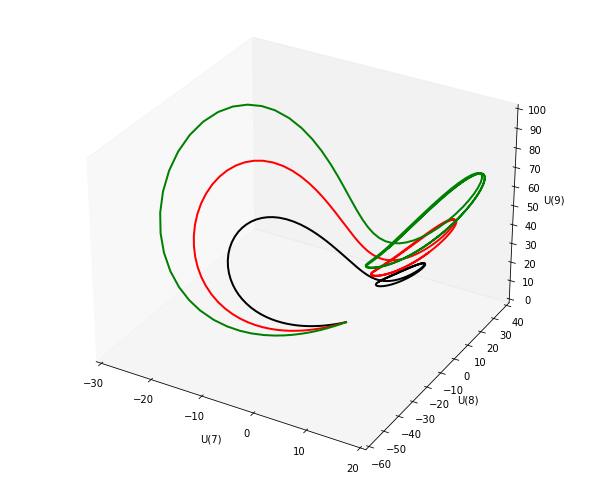

In [14]:
# plot solution showing point to cycle heteroclinic connection

p = ac.plot('cont')
p.config(type='solution')
p.config(grid=False)
p.config(solution_x='U(7)', solution_y='U(8)', solution_z='U(9)')
p.config(label=[10,13,16])
p.savefig('b.png')
display(Image.open('b.png'))

In [15]:
# clean up files

ac.clean()
ac.delete('cont')

Deleting fort.* *.o *.exe *.*~ ... done
Deleting b.cont ... done
Deleting s.cont ... done
Deleting d.cont ... done
